Case Study on Probability for Data Science 

Problem Statement:  
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.  
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) 
Also, if some data pre-processing is necessary do that as well. 


In [ ]:
#importing the librearies

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#importing the dataset

In [3]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
data.shape

(8124, 23)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
#Data Visualization

<ipython-input-13-a8cac549c465>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


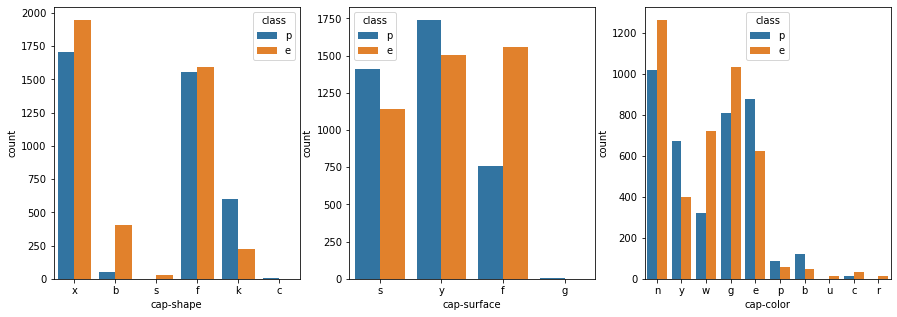

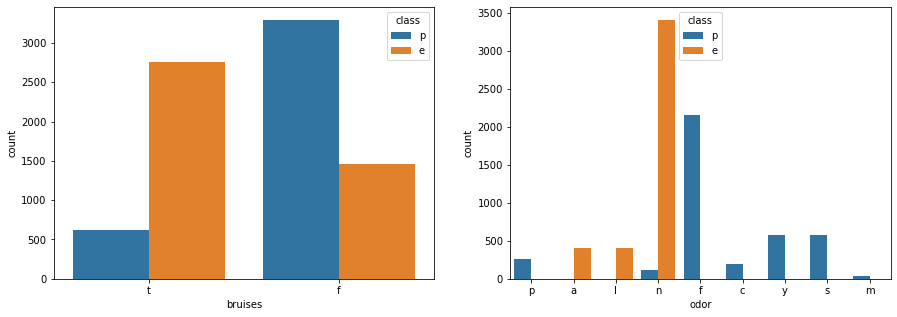

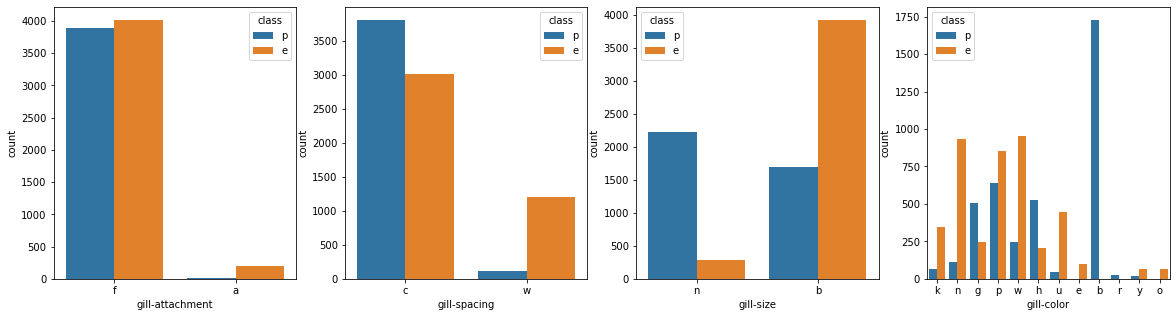

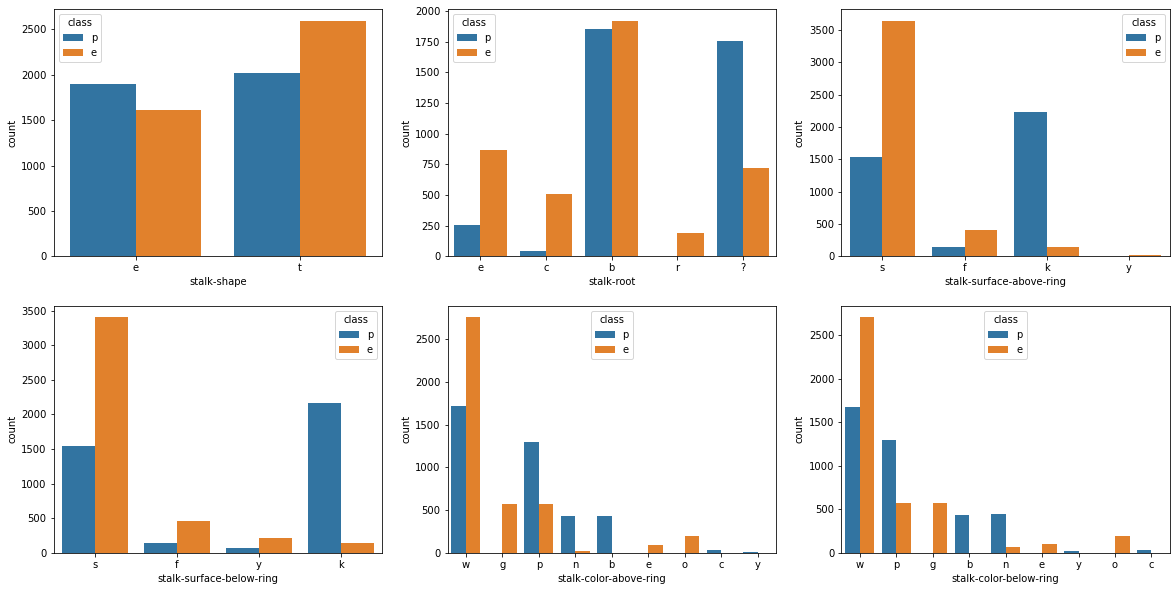

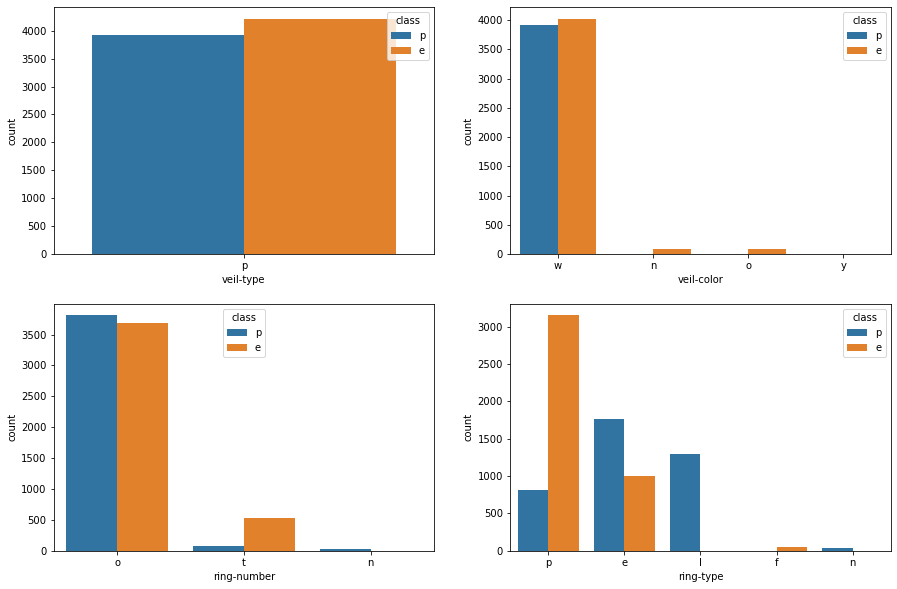

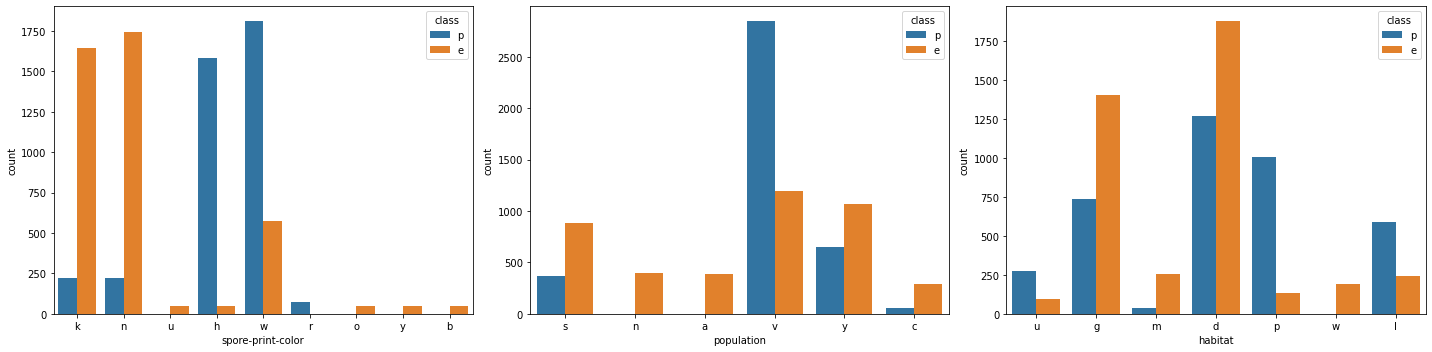

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x="cap-shape", hue='class', data=data, ax=ax[0])
sns.countplot(x="cap-surface", hue='class', data=data, ax=ax[1])
sns.countplot(x="cap-color", hue='class', data=data, ax=ax[2])
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="bruises", hue='class', data=data, ax=ax[0])
sns.countplot(x="odor", hue='class', data=data, ax=ax[1])
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.countplot(x="gill-attachment", hue='class', data=data, ax=ax[0])
sns.countplot(x="gill-spacing", hue='class', data=data, ax=ax[1])
sns.countplot(x="gill-size", hue='class', data=data, ax=ax[2])
sns.countplot(x="gill-color", hue='class', data=data, ax=ax[3])
fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.countplot(x="stalk-shape", hue='class', data=data, ax=ax[0,0])
sns.countplot(x="stalk-root", hue='class', data=data, ax=ax[0,1])
sns.countplot(x="stalk-surface-above-ring", hue='class', data=data, ax=ax[0,2])
sns.countplot(x="stalk-surface-below-ring", hue='class', data=data, ax=ax[1,0])
sns.countplot(x="stalk-color-above-ring", hue='class', data=data, ax=ax[1,1])
sns.countplot(x="stalk-color-below-ring", hue='class', data=data, ax=ax[1,2])
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x="veil-type", hue='class', data=data, ax=ax[0,0])
sns.countplot(x="veil-color", hue='class', data=data, ax=ax[0,1])
sns.countplot(x="ring-number", hue='class', data=data, ax=ax[1,0])
sns.countplot(x="ring-type", hue='class', data=data, ax=ax[1,1])
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.countplot(x="spore-print-color", hue='class', data=data, ax=ax[0])
sns.countplot(x="population", hue='class', data=data, ax=ax[1])
sns.countplot(x="habitat", hue='class', data=data, ax=ax[2])
fig.tight_layout()
fig.show()

Data Preprocessing

In [10]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [15]:
# exclude any Na's which is represented by '?'
data = data[data['stalk-root'] != '?']
# drop column veil-type becaue of 1 only unique observation
data = data.drop(['veil-type'],axis=1)

In [16]:
data.shape

(5644, 22)

Insight:
The feature 'veil-type' has only have one unique observation, which does not add any value to our analysis, therefore we will eliminate it and Remove the '?' value from 'stalk-root' feature, and return the new cleaned dataset.

In [28]:
x=data.drop('class',axis=1) 
y=data['class']
x.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
#Encoding categorical data:Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
Encoder_x = LabelEncoder() 
for col in x.columns:
    x[col] = Encoder_x.fit_transform(x[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [26]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,2,0,...,2,2,5,5,0,1,3,1,3,5
1,5,2,7,1,0,1,0,0,2,0,...,2,2,5,5,0,1,3,2,2,1
2,0,2,6,1,3,1,0,0,3,0,...,2,2,5,5,0,1,3,2,2,3
3,5,3,6,1,6,1,0,1,3,0,...,2,2,5,5,0,1,3,1,3,5
4,5,2,3,0,5,1,1,0,2,1,...,2,2,5,5,0,1,0,2,0,1


In [29]:
y

0       p
1       e
2       e
3       p
4       e
       ..
7986    e
8001    e
8038    e
8095    p
8114    p
Name: class, Length: 5644, dtype: object

In [30]:
#getting dummy variables

x=pd.get_dummies(x,columns=x.columns,drop_first=True)
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
min_max=MinMaxScaler()
x=min_max.fit_transform(x)

In [ ]:
#Splitting the dataset into the Training set and Test set

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [50]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Building Naive-Bayes models:

#1 Gaussian Naive-Bayes

In [56]:
gnb=GaussianNB()
model1=gnb.fit(x_train,y_train)

In [57]:
gnb_predict=model1.predict(x_test)

In [58]:
confusion_matrix(y_test,gnb_predict)

array([[1052,    6],
       [   0,  636]], dtype=int64)

In [59]:
accuracy_score(y_test,gnb_predict)

0.9964580873671782

#2 Bernoulli Naive-Bayes 

In [60]:
bnb=BernoulliNB()
model2=bnb.fit(x_train,y_train)

In [61]:
bnb_predict=model2.predict(x_test)

In [62]:
confusion_matrix(y_test,bnb_predict)

array([[1052,    6],
       [ 132,  504]], dtype=int64)

In [44]:
accuracy_score(y_test,bnb_predict)

0.9185360094451004

#3 Multinomial Naive-Bayes

In [52]:
mnb=MultinomialNB()
model3=mnb.fit(x_train,y_train)

In [53]:
mnb_predict=model3.predict(x_test)

In [54]:
confusion_matrix(y_test,mnb_predict)

array([[1055,    3],
       [  41,  595]], dtype=int64)

In [55]:
accuracy_score(y_test,mnb_predict)

0.974025974025974

The highestaccuracy in Gaussian Naive-Bayes 0.99

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

we use  Support Vector Machine model,RandomForest Model,Logistic Regression Model,Decision Tree model,K-Nearest Neighbors model and Naive Bayes Classification Model 

#1 Support Vector Machine model

In [73]:
from sklearn import svm
from sklearn.svm import SVC

In [74]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [81]:
y_pred=svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy is:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   0  636]]
Accuracy is: 1.0


#2  RandomForest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
from sklearn import metrics
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   0  636]]
Accuracy: 1.0


#3 Logistic Regression Model

In [80]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

#predict on the test data
y_pred=lr.predict(x_test)

print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
#calculate the accuracy score
print('Accuracy:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   0  636]]
Accuracy: 1.0


#4.Decision Tree model

In [79]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   0  636]]
accuracy is 1.0


#5 K-Nearest Neighbors model

In [83]:

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   2  634]]
accuracy is 0.9988193624557261


#6 Naive Bayes Classification Model

In [84]:
gnb=GaussianNB()
model1=gnb.fit(x_train,y_train)
gnb_predict=model1.predict(x_test)

print(classification_report(y_test, y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
print('Accuracy is:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1058
           p       1.00      1.00      1.00       636

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

confusion_matrix:
 [[1058    0]
 [   2  634]]
Accuracy is: 0.9988193624557261


Conclusion:
Support Vector Machine model,RandomForest Model,Logistic Regression Model,Decision Tree model, has accuracy 1.and K-Nearest Neighbors model,Naive Bayes Classification Model has accuracy 0.99.